##### Analyzing Key Factors That Lead to Successful Startups
(An Exploratory Data Analysis)

The following is a project about understanding the key factors that lead to the success of startups, examining industry trends, key milestones, and the impact of funding.

Here are the main goals I had in mind when writing this:

- Outline the typical workflow of a data analysis project.

- Understanding some of the factors that contribute to a startup's success.

I really enjoyed analyzing this dataset and found that the more I explored it, the more questions emerged.

**Dataset**

 The dataset we are going to look today is from Kaggle site. 
 It contains intesting information about industries, funding, acquisition and investment information details of nearly a thousand startups going back to the 1980s and extending up to 2013. 
 
We will talk about some interesting factors that seem to have a strong correlation with a startup's success and analyzing these trends, and pose specific questions to guide our analysis in each area:

- **Which are the top 10 industries where startups have seen the highest rate of acquisitions?" How important is the industry type?**

- **Does the number of milestones achieved impact a startup's chance of getting acquired?**

- **What is the average total funding for startups that successfully get acquired versus those that close?**

- **Do startups that receive funding in rounds A, B, or C have a better chance of succeeding than those that rely on angel investors or venture capital?**

I hope this article will provide insights of data analysis within the startup domain.
The first step in our exploration involves preparing the environment.

 #####  Importing essential libraries for data analysis


In [1057]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import zscore

In [1058]:
# Print the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/gabrielaarzate/Desktop/predicting_startup_succes/notebook


In [1059]:
notebook_directory = 'data'
file_name = 'startup.csv'
file_path = os.path.join('..', 'data', 'startup.csv')
data_df = pd.read_csv(file_path, encoding="ISO-8859-1")

 ##### Initial Data Exploration

Our data analysis workflow begins with an initial data exploration phase. 

Let's take a quick look at the data, This information is essential for making informed decisions about data cleaning, transformation, and analysis strategies.

In [1060]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

After taking a quick look at the data, we can begin to familiarize ourselves with it and understanding what we will be working with. Identifying the data types is essential to make decisions. 

Before going to any data cleaning, Let's begin with an overview of the most crucial categorical variables such as "category_code" and "status" that will certainly help us in answering key questions.

To visualize the variable, we will use bar charts, a widely used tool in data analysis. 
Let's start with the first question:

 **Which are the top 10 industries where startups have seen the highest rate of acquisitions? How important is the industry type?**

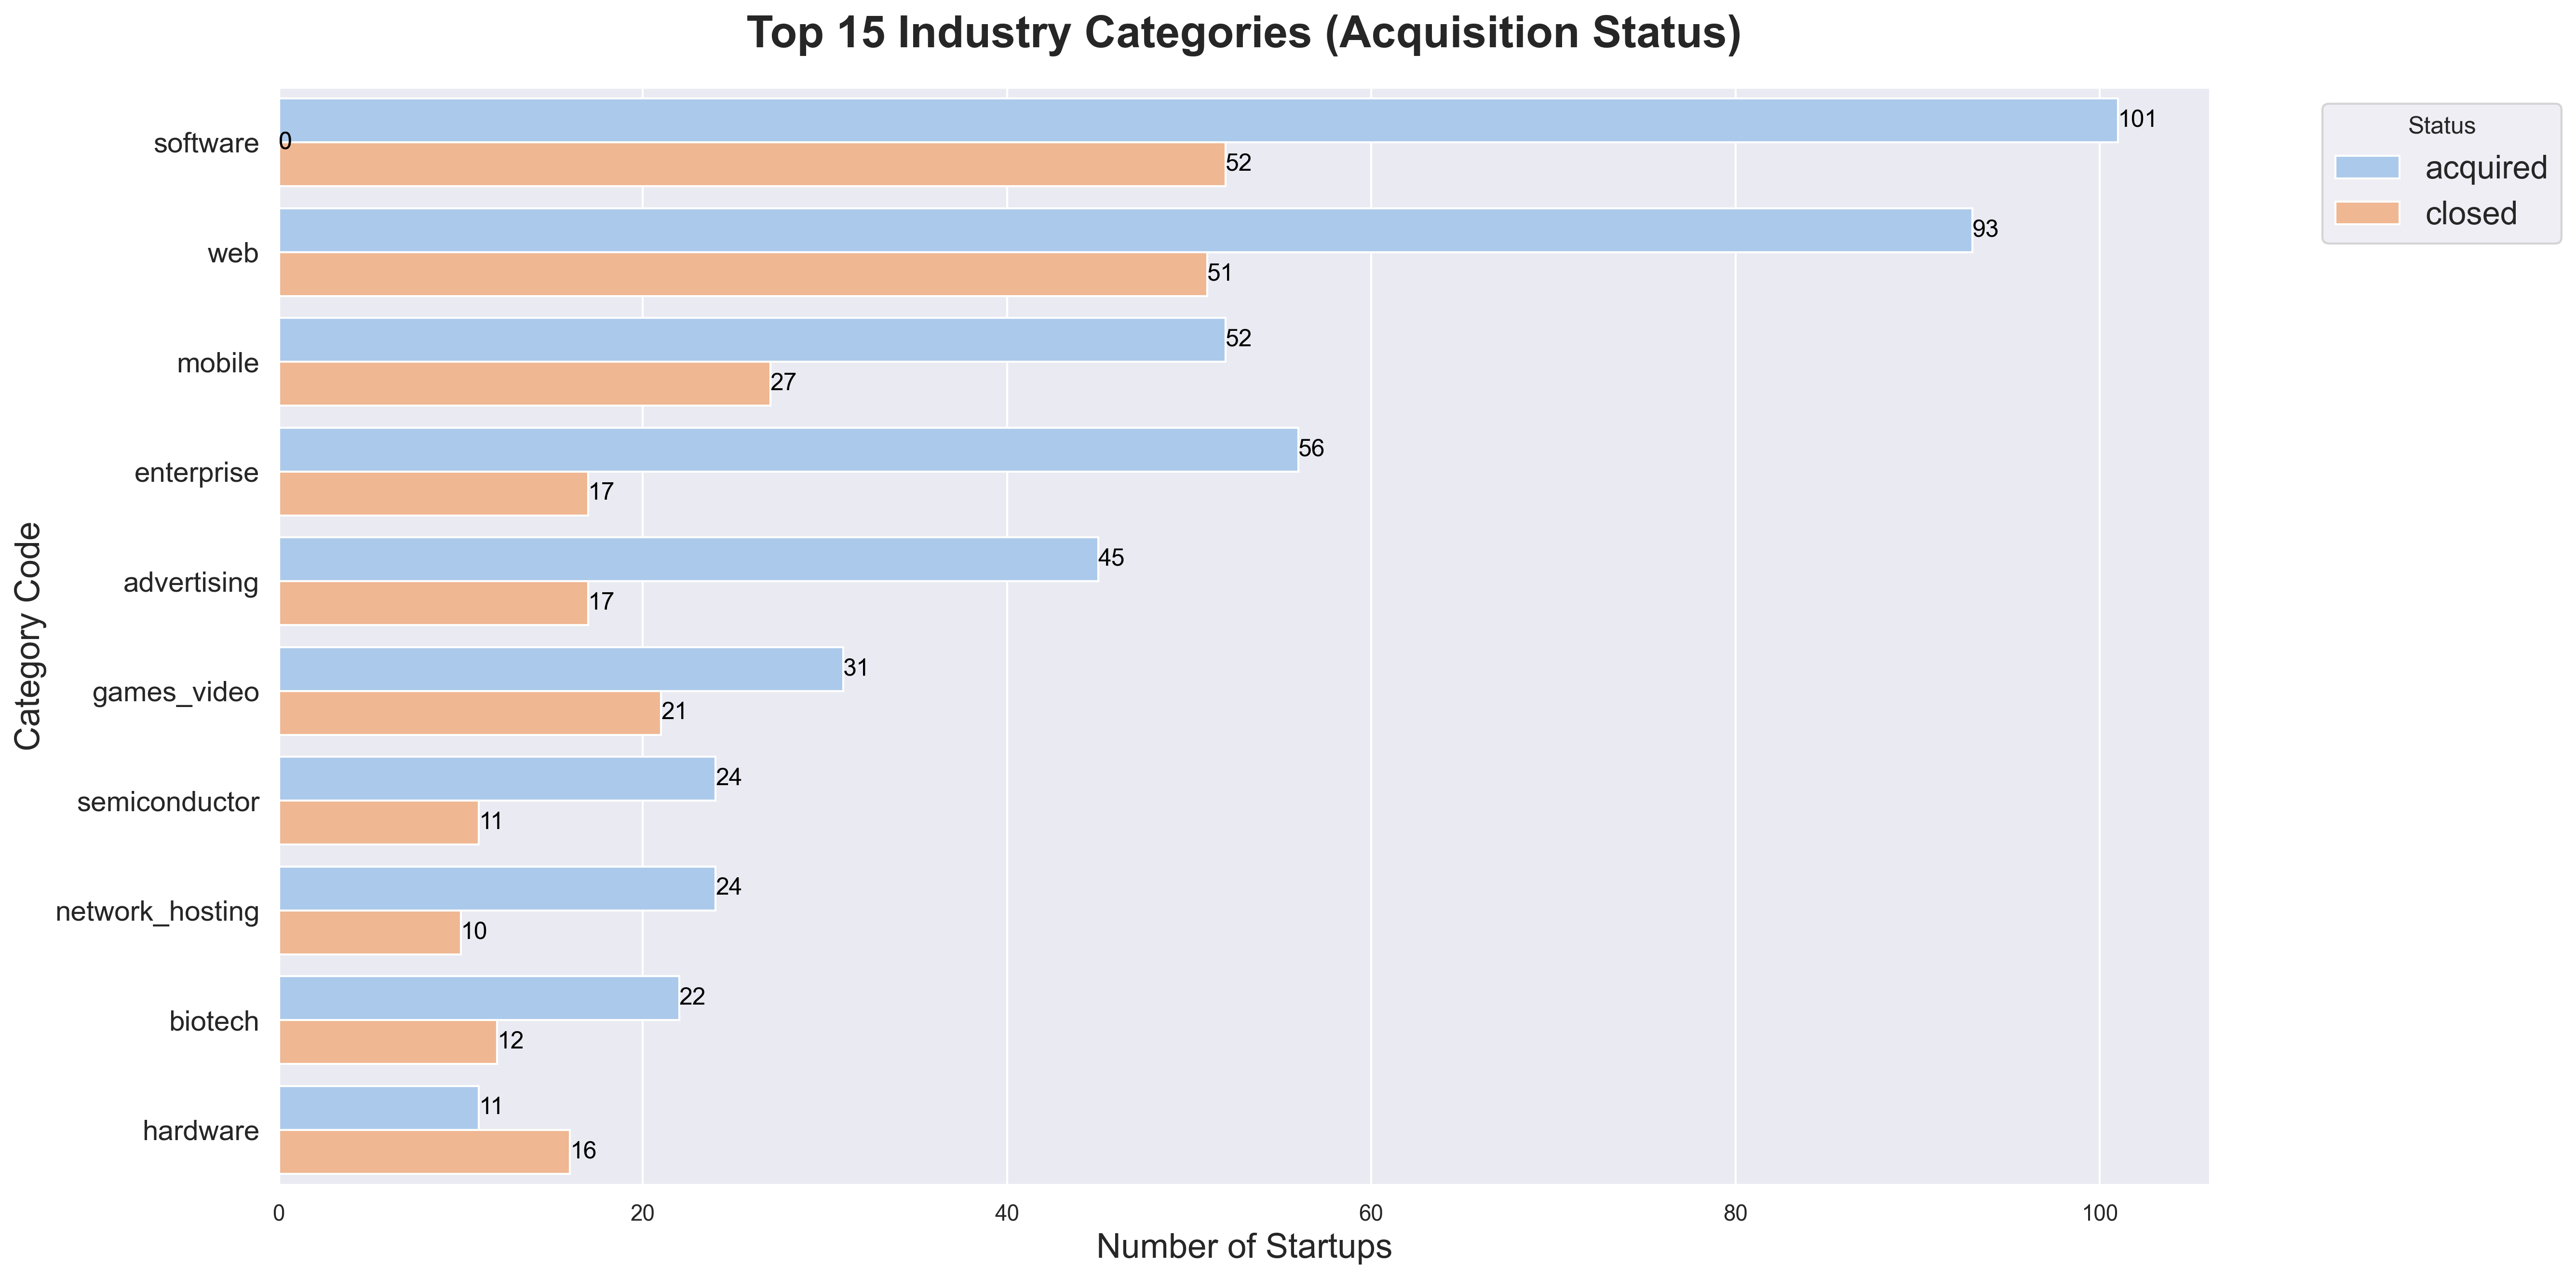

In [1060]:
%matplotlib inline

# Getting the order of categories based on their frequency (now for y-axis since we are doing a horizontal bar plot)
order = data_df["category_code"].value_counts().index[:10]

# Create the countplot with horizontal bars
plt.figure(figsize=(18, 9), dpi=300)

# Specify the hue order explicitly
ax = sns.countplot(y="category_code", data=data_df, order=order, palette="pastel", hue='status', hue_order=['acquired', 'closed'])

plt.title("Top 15 Industry Categories (Acquisition Status)", fontsize=22,pad=20,fontweight='bold')
plt.xlabel("Number of Startups",fontsize=17)
plt.ylabel("Category Code", fontsize=17)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Set the font size of the category labels using tick_params
ax.tick_params(axis='y', labelsize=14) 

# Iterate through the patches (bars) and add text
for bar in ax.patches:
    # Get the position and width of the bar
    bar_y = bar.get_y() + bar.get_height() / 2  # Y-coordinate of the center of the bar
    bar_width = bar.get_width()  # Width of the bar (count value)

    # Add text to the right end of the bar
    ax.text(bar_width, bar_y, f'{int(bar_width)}', 
            fontsize=12, color='black', ha='left', va='center')

plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()


The chart shows that the software industry has the most startups, and many of them get bought by bigger companies. 

The web, mobile, and enterprise sectors also show a relatively large number of startups compared to other industries.
The tech sector is a big player in startups, with many companies in web, mobile, and business areas.

Building on our understanding of the distribution of startups across various industries, the next question we turn our attention to is

**What year was the golden era for startups, and what does it tell us about success rates?**

In [1061]:
data_df['founded_at'] = pd.to_datetime(data_df['founded_at'])
data_df['founded_year'] = data_df['founded_at'].dt.strftime('%Y')

prop_df = data_df.groupby('founded_year').size().reset_index(name = 'counts')
prop_df['proportions'] = prop_df['counts']/prop_df['counts'].sum()

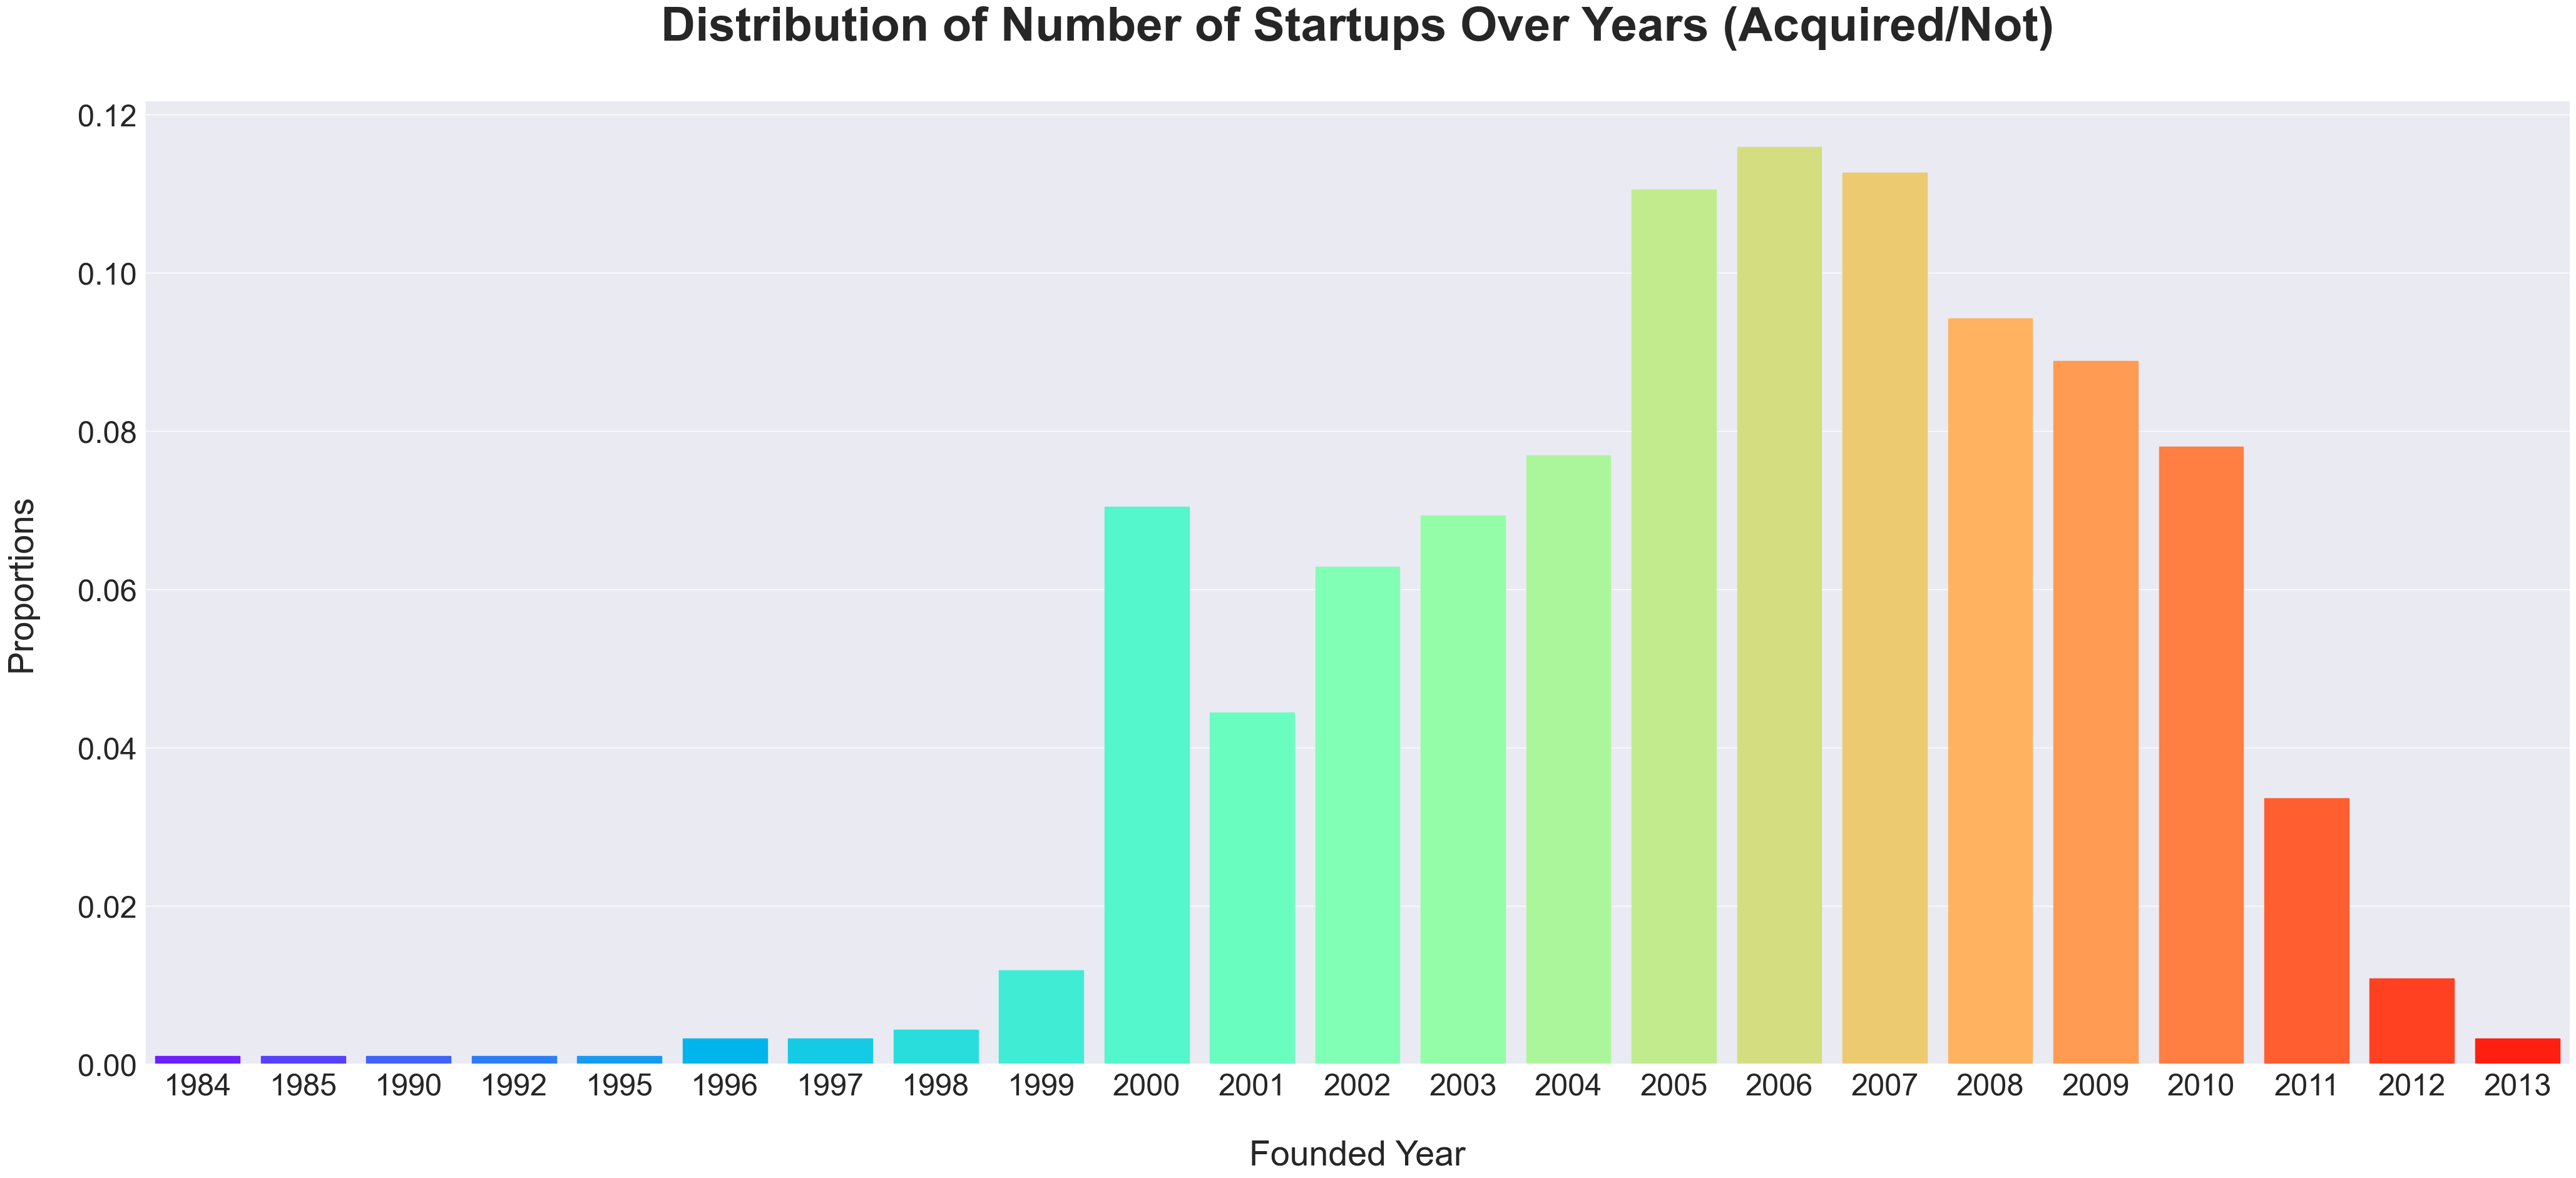

In [1062]:
fig, ax = plt.subplots(figsize=(50, 20))
# Adjust the font size as needed
ax.tick_params(axis='x', labelsize=35)  

# Optionally, change the font size of the tick labels on the y-axis as well
ax.tick_params(axis='y', labelsize=35) 

ax.set_xlabel('Founded Year', fontsize=40,labelpad=45)  # Change the font size as needed
ax.set_ylabel('Proportions', fontsize=40, labelpad=45)  
# Create a barplot without a hue parameter
barplot = sns.barplot(data=prop_df, x='founded_year', y='proportions')

# Manually set colors for each bar if you want them to be different
colors = sns.color_palette("rainbow", n_colors=len(prop_df['founded_year']))
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

plt.title('Distribution of Number of Startups Over Years (Acquired/Not)',fontsize=55, pad=70, fontweight='bold')
plt.show()


We observe a significant increase in the number of startups beginning in the early 2000s appear to have been an era of rapid growth for startups, with a peak in activity around 2007.

- This suggests a boom in startup creation during this period, possibly linked to the rise of the internet and digital technologies, which provided new opportunities for business ventures.

After 2007, there is a noticeable decline in the number of startups, this might be because the market's full, the economy's down, or investors are acting differently.

- The decline becomes particularly steep after 2008, which aligns with the global financial crisis, an event known to have adversely affected business investment and growth.



Having observed the historical trends in startup activity,with significant growth leading up to 2007 followed by a decline influenced by the global financial crisis.

 Now, we aim to explore how location influences startup success by addressing the following question: 

**What is the state of startups across the US?**

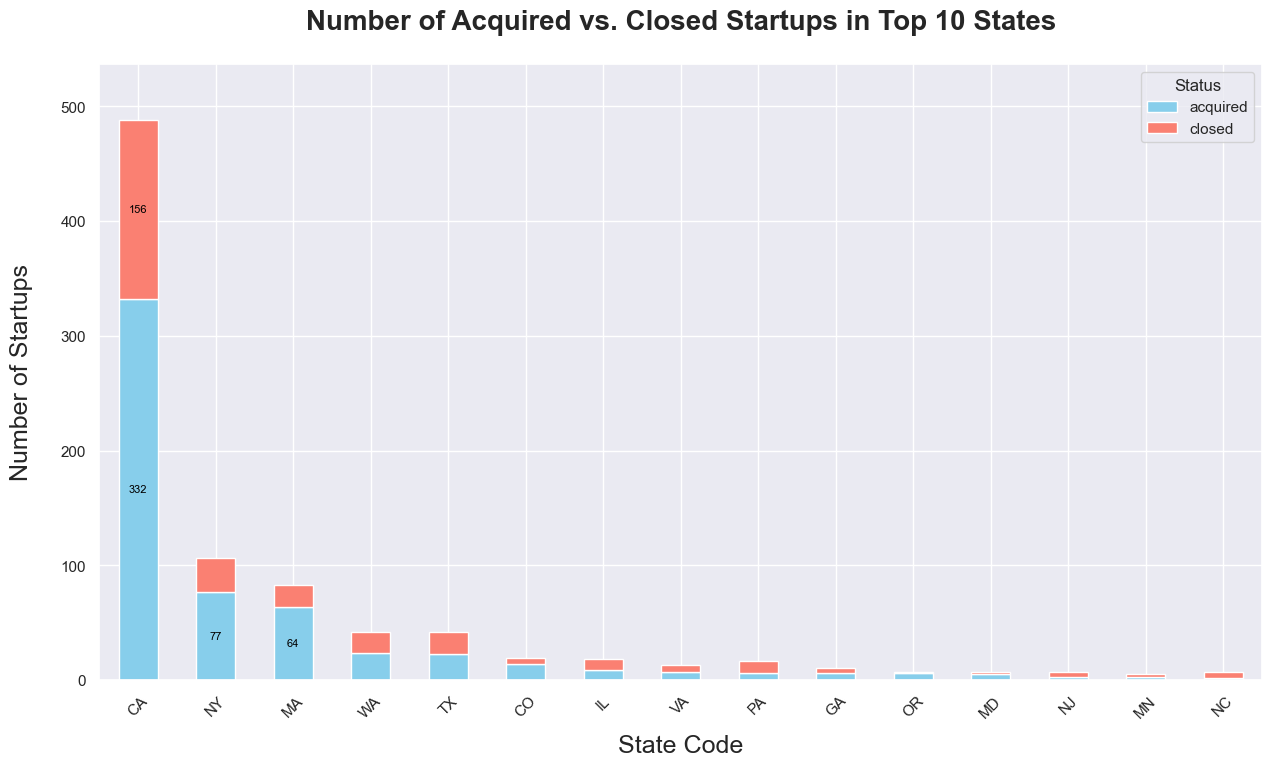

In [1063]:
import matplotlib.pyplot as plt

# Assuming 'data_df' is your DataFrame and it contains 'state_code' and 'status' columns
grouped_data = data_df.groupby(['state_code', 'status']).size().unstack().fillna(0)

# Sort the DataFrame by the sum of 'acquired' and 'closed' for each state and take the first 10
grouped_data = grouped_data.sort_values(by=['acquired', 'closed'], ascending=False).head(15)

# Convert the index to string to ensure proper handling as categorical data
grouped_data.index = grouped_data.index.astype(str)

# Create the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8), color=['skyblue', 'salmon'])
plt.title('Number of Acquired vs. Closed Startups in Top 10 States',fontsize=20, pad=25, fontweight='bold')
plt.xlabel('State Code', fontsize=18,labelpad=10)
plt.ylabel('Number of Startups', fontsize=18,labelpad=20)
plt.xticks(rotation=45)  # Rotates the state labels for better readability
plt.legend(title='Status')

# Define a threshold for displaying annotations
threshold = 50  # Adjust the threshold as needed

# Add text annotations
for i, (state_code, row) in enumerate(grouped_data.iterrows()):
    cumulative_height = 0
    for status in ['acquired', 'closed']:  # Iterate in a specific order
        count = row[status]
        # Display annotation only if count is above the threshold
        if count > threshold:
            # Position text at the center of each segment
            ax.text(i, cumulative_height + count / 2, f'{int(count):,}', 
                    fontsize=8, color='black', ha='center', va='center')
        cumulative_height += count

# Slightly adjust the ylim to make room for text annotations
ax.set_ylim(0, grouped_data.max().sum() * 1.1)  # Increase the y-axis limit
plt.show()


- California (CA) stands out with the highest total number of startups, where the number of acquired startups is more than double the number closed.
- New York (NY) and Massachusetts (MA) follow, with more startups being acquired than closed, which indicates a healthy environment for startups in these states as well.

In other states such as Washington (WA), Texas (TX), and Colorado (CO), the numbers of acquisitions and closures are closer, pointing to a more challenging environment.

After identifying key distributions that have aided in answering our initial questions, we will now proceed with data cleaning.

This step is crucial for ensuring the accuracy and reliability of our findings, as it involves removing inaccuracies, filling missing values, and correcting inconsistencies in the dataset.

 ##### Cleaning the data 

Before going deeper into our analysis,Here's how we'll approach this essential phase:

- **Dropping Irrelevant Features**: We'll start by removing data that doesn't help in our analysis, to focus on what's truly important for startup success.

- **Handling Missing Values**: Missing information can lead to incorrect analysis. We'll find and fix these gaps to make our data complete.

- **Correcting Negative Values**: If there are negative numbers where they don't make sense, we'll correct them. This ensures our data accurately reflects reality.

- **Handling Outliers**: Extremely high or low values can mislead our analysis. We'll identify and manage these outliers to prevent distortion in our trends and patterns.


In [1064]:
# Assuming you have a DataFrame called 'data'
count = data_df['status'].value_counts()
# Print the count with labels
print(f'Acquired: {count[1]}, Closed: {count[0]}')

Acquired: 326, Closed: 597


/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_1218/2792090454.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



As we've seen, 597 startups in our dataset achieved the milestone of being acquired, while 597 while a smaller number, 326, ended up closing down.

To further our analysis and make the data more manageable, our next step will be to refine the 'status' column. We'll convert the categorical values—'acquired' and 'closed'—into numeric values. Make it easier to apply statistical models for deeper insights.

In [1065]:
data_df['status'] = data_df.status.map({'acquired':1, 'closed':0})
data_df.head(2)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,0,1,0,0,0,0,1.00,0,1,2007
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,1,0,0,1,1,1,4.75,1,1,2000


 ##### Drop Irrelevant Features

After a thorough analysis of the data, I identified many variables were repeating information, while others were not contributing much value to our analysis. This redundancy and lack of relevance can clutter our dataset, making it harder to navigate and analyze effectively. 

The best approach is to drop some of the irrelevant variables, such as 'Unnamed: 0', 'latitude', 'longitude', 'id', 'Unnamed: 6', 'name', and 'state_code.1', among others.

In [1066]:
data_df = data_df.drop(['Unnamed: 0','latitude','longitude','zip_code','id','Unnamed: 6','name','labels','state_code.1','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','object_id'], axis=1).copy()
data_df.head(2)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year
0,CA,San Diego,2007-01-01,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,0,1,0,0,0,0,1.00,0,1,2007
1,CA,Los Gatos,2000-01-01,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,1,0,0,1,1,1,4.75,1,1,2000


In [1067]:
num_columns = len(data_df.columns)
print(f"""
After removing irrelevant features, we've streamlined the DataFrame significantly. 
Originally starting with 50 columns, now the DataFrame has {num_columns} columns.
""")


After removing irrelevant features, we've streamlined the DataFrame significantly. 
Originally starting with 50 columns, now the DataFrame has 25 columns.



Now that we have discarded meaningless variables for our analysis, let's continue with the next step.

 ##### Handle Missing Values

In [1068]:
x= data_df.isnull().sum()
x.sort_values(ascending=False)

closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
state_code                    0
category_code                 0
status                        0
is_top500                     0
avg_participants              0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
has_VC                        0
funding_total_usd             0
milestones                    0
city                          0
funding_rounds                0
relationships                 0
age_last_funding_year         0
age_first_funding_year        0
last_funding_at               0
first_funding_at              0
founded_at                    0
founded_year                  0
dtype: int64

Given the nature of the variables "age_first_milestone_year" and "age_last_milestone_year," we will fill missing values with the mean. It's a straightforward approach that can be easily implemented. The added values, centered around the central tendency of the data, help preserve the original distribution. This method is particularly suitable for continuous numerical variables. 

It's important to note that while filling missing values with the mean is widely used, it may not always be the best approach for every situation.

In [1069]:
data_df["age_first_milestone_year"] = data_df["age_first_milestone_year"].fillna(data_df["age_first_milestone_year"].mean())
data_df["age_last_milestone_year"] = data_df["age_last_milestone_year"].fillna(data_df["age_last_milestone_year"].mean())

In [1070]:
data= data_df.isnull().sum()
data.sort_values(ascending=False)

closed_at                   588
state_code                    0
milestones                    0
status                        0
is_top500                     0
avg_participants              0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
has_VC                        0
category_code                 0
funding_total_usd             0
city                          0
funding_rounds                0
relationships                 0
age_last_milestone_year       0
age_first_milestone_year      0
age_last_funding_year         0
age_first_funding_year        0
last_funding_at               0
first_funding_at              0
founded_at                    0
founded_year                  0
dtype: int64

**General Changes:**

- Imputed values for 'age_first_milestone_year' and 'age_last_milestone_year'.
  
- Missing values in 'closed_at' represent startups that are still open and will not be filled for now. This approach preserves the information that certain startups are still active without arbitrarily assigning a closure date. 

##### Handle Negative values 

Before continue we will convert the following columns into datetime format, we ensure that they are suitable for time-based analysis. 

In [1071]:
data_df.founded_at=pd.to_datetime(data_df.founded_at)
data_df.first_funding_at=pd.to_datetime(data_df.first_funding_at)
data_df.last_funding_at=pd.to_datetime(data_df.last_funding_at)

To detect negative values, we will use a powerful tool for initial data exploration: box plots. These help analysts quickly identify and address negative values that may indicate data entry errors or other anomalies.

According to our data set, most of the features are binary which are not suitable for negative values detection. We will consider only the following continuos variables.

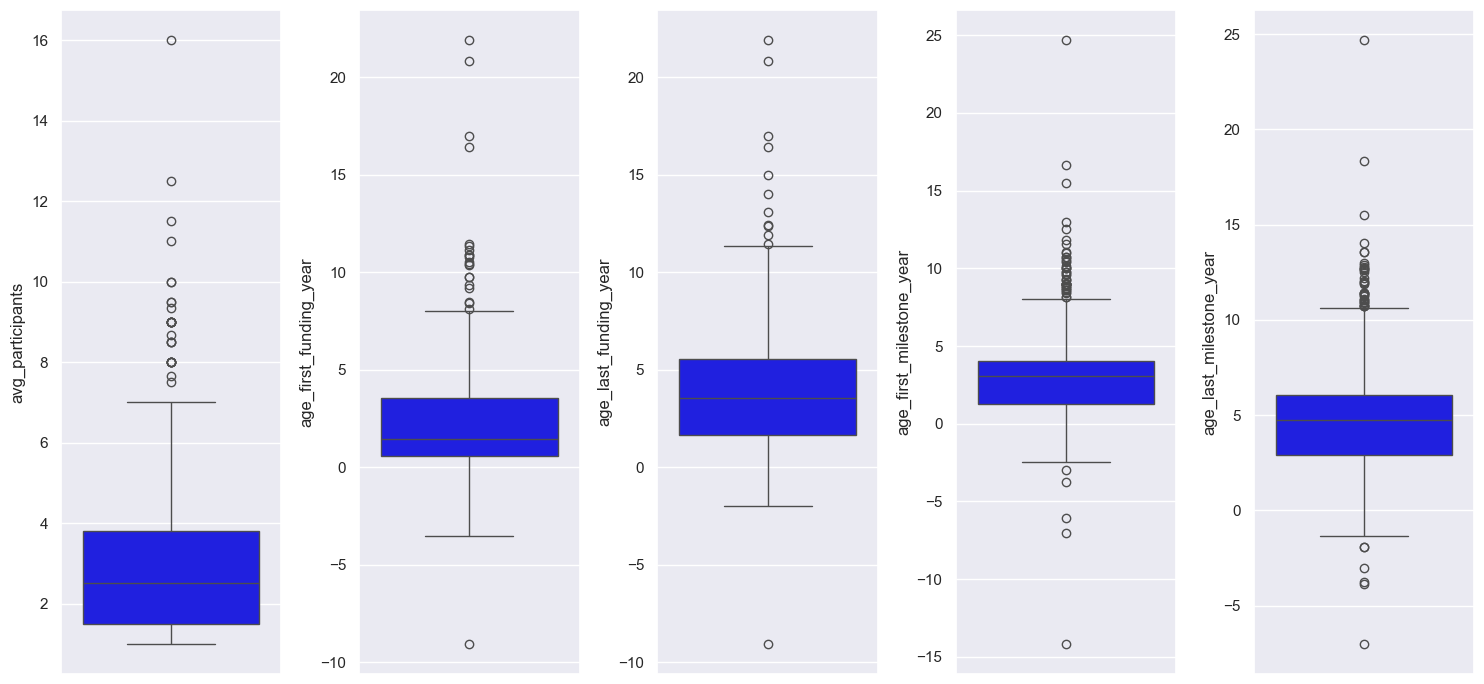

In [1072]:
featuresNumfinal = ['avg_participants','age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year']
plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=data_df[featuresNumfinal[i]], color='blue', orient='v')
    plt.tight_layout()

Each box plot is a way to show how spread out numbers are in a set of data.

The points that appear outside the main body of the box plot represent values that are outside the typical range of the dataset. 

In this case, the points that are below the lower whisker of the box plots indicate that they are negative values, as seen in box plots 2, 3, 4, and 5.

The points lying above the upper whisker represent the positive outliers. We will address these in a later stage of our analysis.

Using another visualization we can see clearly the negative values in our Dataset.

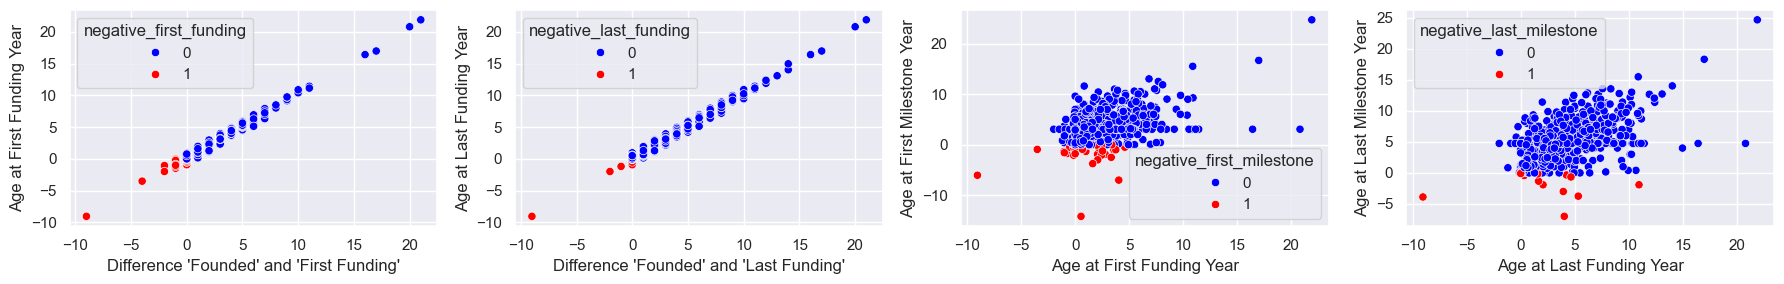

In [1073]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_df' is your DataFrame and it has the necessary columns
# Define a custom color palette for negative and non-negative values
custom_palette = {0: "blue", 1: "red"}

# Create new columns to identify negative values for first and last funding and milestone years
data_df['negative_first_funding'] = (data_df["age_first_funding_year"] < 0).astype(int)
data_df['negative_last_funding'] = (data_df["age_last_funding_year"] < 0).astype(int)
data_df['negative_first_milestone'] = (data_df["age_first_milestone_year"] < 0).astype(int)
data_df['negative_last_milestone'] = (data_df["age_last_milestone_year"] < 0).astype(int)

plt.figure(figsize=(18, 3), dpi=100)

# First subplot for 'age_first_funding_year'
plt.subplot(1, 4, 1)
sns.scatterplot(
    x=data_df["first_funding_at"].dt.year - data_df["founded_at"].dt.year, 
    y=data_df["age_first_funding_year"],
    hue=data_df["negative_first_funding"], 
    palette=custom_palette
)
plt.xlabel("Difference 'Founded' and 'First Funding'")
plt.ylabel("Age at First Funding Year")

# Second subplot for 'age_last_funding_year'
plt.subplot(1, 4, 2)
sns.scatterplot(
    x=data_df["last_funding_at"].dt.year - data_df["founded_at"].dt.year, 
    y=data_df["age_last_funding_year"],
    hue=data_df["negative_last_funding"], 
    palette=custom_palette
)
plt.xlabel("Difference 'Founded' and 'Last Funding'")
plt.ylabel("Age at Last Funding Year")

# Third subplot for 'age_first_milestone_year'
plt.subplot(1, 4, 3)
sns.scatterplot(
    x=data_df["age_first_funding_year"], 
    y=data_df["age_first_milestone_year"],
    hue=data_df["negative_first_milestone"], 
    palette=custom_palette
)
plt.xlabel("Age at First Funding Year")
plt.ylabel("Age at First Milestone Year")

# Fourth subplot for 'age_last_milestone_year'
plt.subplot(1, 4, 4)
sns.scatterplot(
    x=data_df["age_last_funding_year"], 
    y=data_df["age_last_milestone_year"],
    hue=data_df["negative_last_milestone"], 
    palette=custom_palette
)
plt.xlabel("Age at Last Funding Year")
plt.ylabel("Age at Last Milestone Year")

plt.tight_layout()  # Adjust the layout
plt.show()


In the visualizations, we identify the negative values by marking them with red, and the positive values with blue.

The occurrence of negative values could be attributed to several reasons, such as pre-incorporation activities, data entry errors, or a relative timing approach where events are recorded with respect to a specific milestone. However, without definitive context, we cannot be certain of the exact cause.

For the purposes of our analysis, we'll focus on how to handle these negative values. By doing so, we can maintain the integrity of our analysis and ensure that our insights are based on accurate and representative data.

In [1074]:
age_columns = ["age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"]
for column in age_columns:
    has_negative_values = (data_df[column] < 0).any()
    print(f"Negative values in '{column}' column: {has_negative_values}")

Negative values in 'age_first_funding_year' column: True
Negative values in 'age_last_funding_year' column: True
Negative values in 'age_first_milestone_year' column: True
Negative values in 'age_last_milestone_year' column: True


After confirming presence of negative values we used a function called 'np.abs()' to turn these negative values into positive ones. Helped us keep our data consistent and ready for further analysis 

In [1075]:
data_df["age_first_funding_year"]=np.abs(data_df["age_first_funding_year"])
data_df["age_last_funding_year"]=np.abs(data_df["age_last_funding_year"])
data_df["age_first_milestone_year"]=np.abs(data_df["age_first_milestone_year"])
data_df["age_last_milestone_year"]=np.abs(data_df["age_last_milestone_year"])

Now we verify there is not presence of negative values in our dataset.

In [1076]:
age_columns = ["age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"]
for column in age_columns:
    has_negative_values = (data_df[column] < 0).any()
    print(f"Negative values in '{column}' column: {has_negative_values}")

Negative values in 'age_first_funding_year' column: False
Negative values in 'age_last_funding_year' column: False
Negative values in 'age_first_milestone_year' column: False
Negative values in 'age_last_milestone_year' column: False


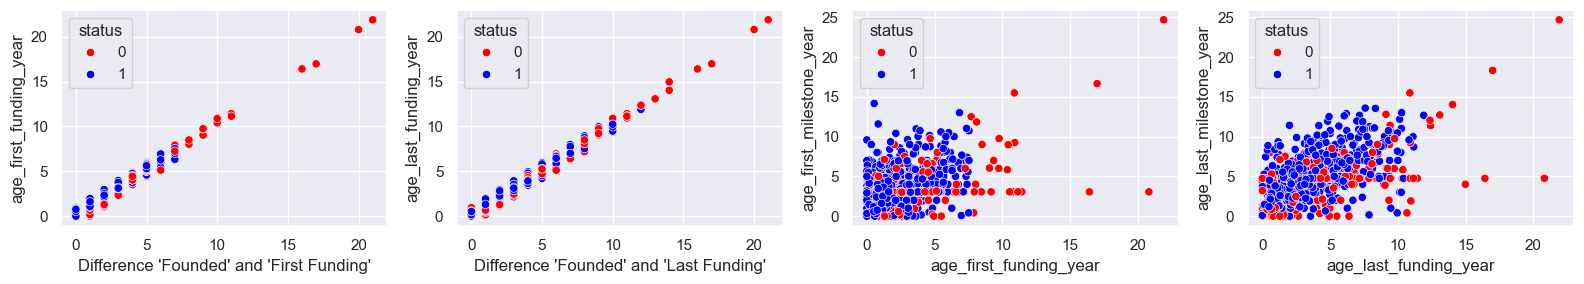

In [1077]:
# Define a custom color palette
custom_palette = {0: "red", 1: "blue"}

plt.figure(figsize=(16, 3), dpi=100)

# First subplot
plt.subplot(1, 4, 1)
sns.scatterplot(x=np.abs(data_df["first_funding_at"].dt.year - data_df["founded_at"].dt.year), 
                y=data_df["age_first_funding_year"], hue=data_df["status"], palette=custom_palette)
plt.xlabel("Difference 'Founded' and 'First Funding'")

# Second subplot
plt.subplot(1, 4, 2)
sns.scatterplot(x=np.abs(data_df["last_funding_at"].dt.year - data_df["founded_at"].dt.year), 
                y=data_df["age_last_funding_year"], hue=data_df["status"], palette=custom_palette)
plt.xlabel("Difference 'Founded' and 'Last Funding'")

# Third subplot
plt.subplot(1, 4, 3)
sns.scatterplot(x=data_df["age_first_funding_year"], 
                y=data_df["age_first_milestone_year"], hue=data_df["status"], palette=custom_palette)

# Fourth subplot
plt.subplot(1, 4, 4)
sns.scatterplot(x=data_df["age_last_funding_year"], 
                y=data_df["age_last_milestone_year"], hue=data_df["status"], palette=custom_palette)

plt.tight_layout()  # Adjust the layout
plt.show()



The result was a cleaner dataset, as reflected in the updated plots, which now likely show a more realistic representation of the company's age at various funding and milestone events without the skewing effect of incorrect negative age values.

##### Handle Outliers

After eliminating negative values from the dataset, we will proceed to address outliers. Outliers are data points that significantly deviate from the main group of values in a dataset. These extreme values can distort statistical analyses and impact the reliability of our findings

In [1078]:
# Select only numeric columns for histogram plots
numeric_columns = data_df.select_dtypes(include=[np.number]).columns.tolist()

# Determine the number of rows and columns for the subplots
num_variables = len(numeric_columns)
num_columns = 5  # You can choose how many columns you want per row
num_rows = int(np.ceil(num_variables / num_columns))

# Set the overall figure size to give each subplot a little more room
fig_width = num_columns * 6  # 5 inches per subplot column
fig_height = num_rows * 5    # 4 inches per subplot row

plt.figure(figsize=(fig_width, fig_height))

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_columns, i+1)
    plt.title(column, fontsize=25)
    sns.histplot(data_df[column], color="red", kde=True)  # Adding KDE for smooth distribution curve.
    plt.xlabel('')  # Remove x labels to prevent clutter
    plt.ylabel('')  # Remove y labels to prevent clutter

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                923 non-null    object        
 1   city                      923 non-null    object        
 2   founded_at                923 non-null    datetime64[ns]
 3   closed_at                 335 non-null    object        
 4   first_funding_at          923 non-null    datetime64[ns]
 5   last_funding_at           923 non-null    datetime64[ns]
 6   age_first_funding_year    923 non-null    float64       
 7   age_last_funding_year     923 non-null    float64       
 8   age_first_milestone_year  923 non-null    float64       
 9   age_last_milestone_year   923 non-null    float64       
 10  relationships             923 non-null    int64         
 11  funding_rounds            923 non-null    int64         
 12  funding_total_usd     

We will focus our exploration on continuous variables with more noticeable presence of outliers.
- 'age_first_funding_year', 
- 'age_first_milestone_year',
- 'age_last_milestone_year'
- 'relationships' 

**Function z-score**

To determinate how much our dataset is affected by unusual data points (outliers) and to decide on a threshold for spotting these outliers, we use a statistical tool called the Z-score function.

Z-scores help us see how different a data point is from the average (mean) of the dataset. We will apply this method to one of the columns that has a higher number of outliers.("age_first_milestone_year").

In [ ]:
zscores=zscore(data_df["age_first_milestone_year"])
for threshold in range(1,6,1):
    print("Threshold value: {}". format(threshold))
    print("Number of outliers: {}".format(len(np.where(zscores>threshold)[0])))

Threshold value: 1
Number of outliers: 135
Threshold value: 2
Number of outliers: 40
Threshold value: 3
Number of outliers: 10
Threshold value: 4
Number of outliers: 4
Threshold value: 5
Number of outliers: 2


The z-score analysis for the 'age_first_milestone_year' column shows that as you increase the threshold value, the number of outliers decreases. 

Lower thresholds will identify more outliers, while higher thresholds will identify fewer. 

Now that we have used the Z-score method to identify outliers in our data, the next step is to apply log transformation to helps to normalize it.

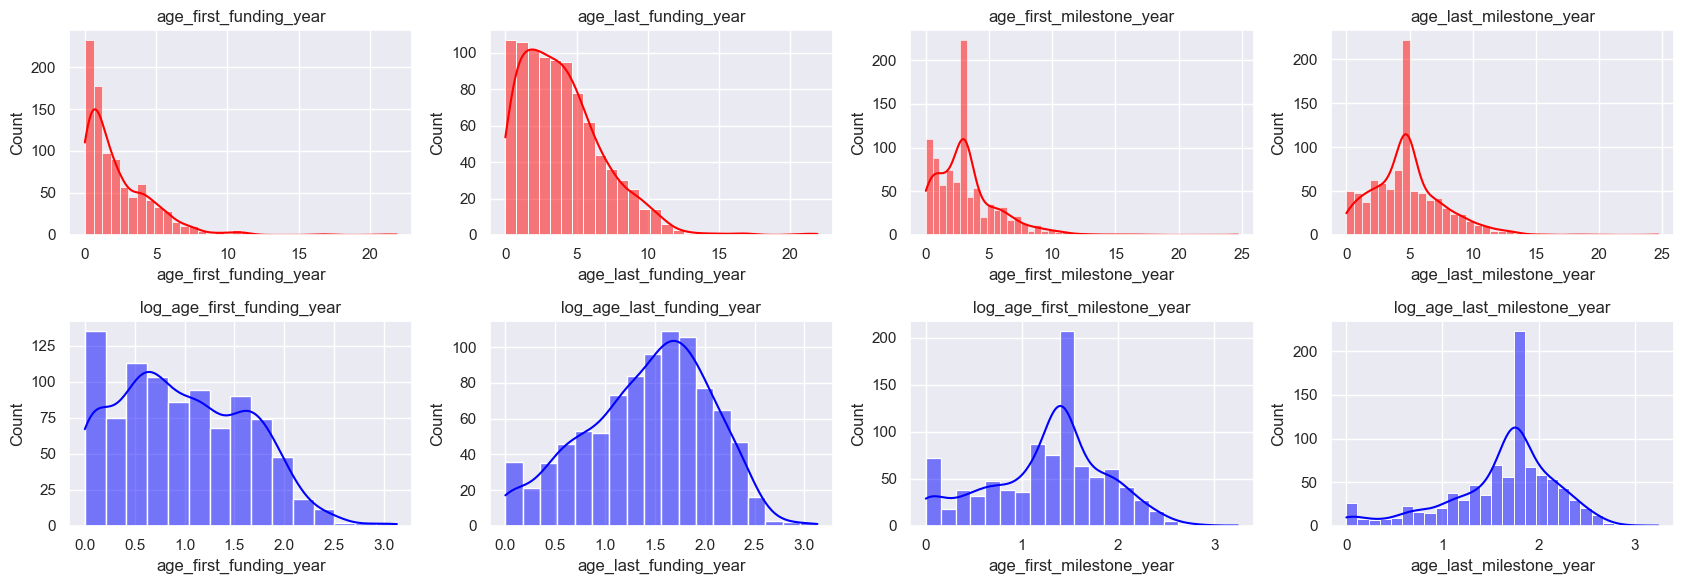

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

variables = ["age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"]

# Create a figure with a specific size
plt.figure(figsize=(17, 6), dpi=100)

# Loop through the list of variables
for i, variable in enumerate(variables):
    # Regular histogram
    plt.subplot(2, 4, i + 1)
    sns.histplot(data_df[variable], color="red", kde=True)
    plt.title(variable)

    # Log-transformed histogram
    plt.subplot(2, 4, i + 5)
    log_variable = np.log(data_df[variable] + 1)  # Adding 1 to avoid log(0)
    sns.histplot(log_variable, color="blue", kde=True)
    plt.title(f"log_{variable}")

plt.tight_layout()
plt.show()

 When you use the logarithm on data, compresses the outliers closer to the rest of the values. This makes the distribution of the data look more like a balanced and symmetrical shape, similar to a bell curve. 
 - It's important to note that log transformation doesn't remove outliers entirely; it reduces their impact.

##### Converting Categorical features to Numerical values

Lets quickly inspect the first few rows of your DataFrame after sorting by index. 

In [ ]:
data_df.sort_index().head(2)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_roundC,has_roundD,avg_participants,is_top500,status,founded_year,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone
0,CA,San Diego,2007-01-01,NaN,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,0,0,1.00,0,1,2007,0,0,0,0
1,CA,Los Gatos,2000-01-01,NaN,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,1,1,4.75,1,1,2000,0,0,0,0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                923 non-null    object        
 1   city                      923 non-null    object        
 2   founded_at                923 non-null    datetime64[ns]
 3   closed_at                 335 non-null    object        
 4   first_funding_at          923 non-null    datetime64[ns]
 5   last_funding_at           923 non-null    datetime64[ns]
 6   age_first_funding_year    923 non-null    float64       
 7   age_last_funding_year     923 non-null    float64       
 8   age_first_milestone_year  923 non-null    float64       
 9   age_last_milestone_year   923 non-null    float64       
 10  relationships             923 non-null    int64         
 11  funding_rounds            923 non-null    int64         
 12  funding_total_usd     

In order to better analyze and understand the startup dataset, we are taking several data preparation steps:

In [ ]:
data_df = data_df

#We convert the 'closed_at' column to datetime format, handling any conversion errors. 
data_df['closed_at'] = pd.to_datetime(data_df['closed_at'], errors='coerce')

#Sort DataFrame by 'closed_at' in descending order revealing the most recent startup closures.
data_df = data_df.sort_values(by='closed_at', ascending=False )

#Find the last closing date
last_closed_date = data_df['closed_at'].dropna().iloc[0]

#Confirm is the right value
print("Last startup closing date:", last_closed_date)

#temporary variable, 'closed_temp,' is created to preserve non-null values of the 'closed_at' column for calculations.
closed_temp = data_df['closed_at'].copy()

#Fill the null values in 'closed_temp' with the last closed date(2013-10-30)
closed_temp.fillna(last_closed_date, inplace=True)

#Calculate the relative age based on 'founded_at' and 'closed_temp'
data_df['age'] = ((closed_temp - data_df['founded_at']).dt.days / 365.25).round(4)

#Missing values in 'closed_at' are replaced with 'x' to signify operating startups.
data_df['closed_at'] = data_df['closed_at'].fillna(value="x")

#'closed_at' values are converted to binary: 1 for 'x' (still operating) and 0 otherwise.
data_df['closed_at'] = data_df.closed_at.apply(lambda x: 1 if x =='x' else 0)

Last startup closing date: 2013-10-30 00:00:00


In [ ]:
data_df.sort_index().head(2)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_roundD,avg_participants,is_top500,status,founded_year,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone,age
0,CA,San Diego,2007-01-01,1,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,0,1.00,0,1,2007,0,0,0,0,6.8282
1,CA,Los Gatos,2000-01-01,1,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,1,4.75,1,1,2000,0,0,0,0,13.8289


Converting categorical to Numerical values

We adopted a specific technique called the custom mapping method to convert categorical into numerical values.

- This process involves: identifying unique categories per column.
- Creating mappings to assign each category a unique integer.

In [ ]:
# List of categorical columns
categorical_columns = ['state_code', 'city', 'category_code','founded_year']
# Dictionary to store mappings
column_mappings = {}

# Create a function to generate mappings
def create_mapping(column):
    unique_values = data_df[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    return mapping

# Apply mapping for each categorical column
for column in categorical_columns:
    mapping = create_mapping(column)
    data_df[column] = data_df[column].map(mapping)
    # Save mapping in the dictionary
    column_mappings[column] = mapping

# Now, column_mappings contains the desired dictionary structure
print(column_mappings)

{'state_code': {'CA': 0, 'NY': 1, 'MI': 2, 'IL': 3, 'NJ': 4, 'OH': 5, 'DC': 6, 'TX': 7, 'CT': 8, 'WA': 9, 'PA': 10, 'MA': 11, 'TN': 12, 'ME': 13, 'ID': 14, 'VA': 15, 'MN': 16, 'NC': 17, 'GA': 18, 'CO': 19, 'FL': 20, 'MD': 21, 'WI': 22, 'AR': 23, 'IN': 24, 'UT': 25, 'AZ': 26, 'KY': 27, 'NM': 28, 'NH': 29, 'RI': 30, 'OR': 31, 'NV': 32, 'MO': 33, 'WV': 34}, 'city': {'Mountain View': 0, 'San Diego': 1, 'New York': 2, 'San Francisco': 3, 'Bingham Farms': 4, 'Chicago': 5, 'Hillsborough': 6, 'Cincinnati': 7, 'Yorba Linda': 8, 'San Jose': 9, 'Fremont': 10, 'Washington': 11, 'Austin': 12, 'Westport': 13, 'Seattle': 14, 'Philadelphia': 15, 'Evanston': 16, 'Champaign': 17, 'Pittsburgh': 18, 'NYC': 19, 'Waltham': 20, 'San Mateo': 21, 'Palo Alto': 22, 'Memphis': 23, 'South San Francisco': 24, 'West Newfield': 25, 'Beverly Hills': 26, 'NY': 27, 'Idaho Falls': 28, 'Burlington': 29, 'Viena': 30, 'Red Bank': 31, 'Toledo': 32, 'Andover': 33, 'Saint Paul': 34, 'Boston': 35, 'Cambridge': 36, 'Canton': 37,

In [ ]:
data_df.sort_index().head(2)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,has_roundD,avg_participants,is_top500,status,founded_year,negative_first_funding,negative_last_funding,negative_first_milestone,negative_last_milestone,age
0,0,1,2007-01-01,1,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,0,1.00,0,1,1,0,0,0,0,6.8282
1,0,61,2000-01-01,1,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,1,4.75,1,1,9,0,0,0,0,13.8289


In [ ]:
numerical_features = data_df.select_dtypes(include=['number']).columns.tolist()
categorical_features = data_df.select_dtypes(include=['object']).columns.tolist()
datetime_features = data_df.select_dtypes(include=['datetime']).columns.tolist()

# Assuming the target variable is 'status'
target_variable = ['is_acquired']

# Print the lists along with the number of features
print("Numerical Features ({0}):".format(len(numerical_features)))
print(numerical_features)

print("\nCategorical Features ({0}):".format(len(categorical_features)))
print(categorical_features)

print("\nDatetime Features ({0}):".format(len(datetime_features)))
print(datetime_features)

print("\nTarget Variable ({0}):".format(len(target_variable)))
print(target_variable)

Numerical Features (27):
['state_code', 'city', 'closed_at', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'category_code', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status', 'founded_year', 'negative_first_funding', 'negative_last_funding', 'negative_first_milestone', 'negative_last_milestone', 'age']

Categorical Features (0):
[]

Datetime Features (3):
['founded_at', 'first_funding_at', 'last_funding_at']

Target Variable (1):
['is_acquired']


Selecting the appropriate method for converting categorical data into numerical values is crucial. Techniques like one-hot encoding, label encoding, or ordinal encoding are chosen based on the nature of the categorical data (nominal or ordinal) and the specific requirements of the analysis. 

The goal is always to preserve and highlight the inherent characteristics of the data while making it more amenable to analysis.

##### **Data Analysis** 

#####  Correlation between variables and startup success

Now that we have transformed all categorical variables into numerical, we can explore the relationships between them. To facilitate a clearer understanding, we employ a correlation matrix heatmap.

 This visual tool offers a graphical representation of the correlation coefficients between variable pairs within our dataset.

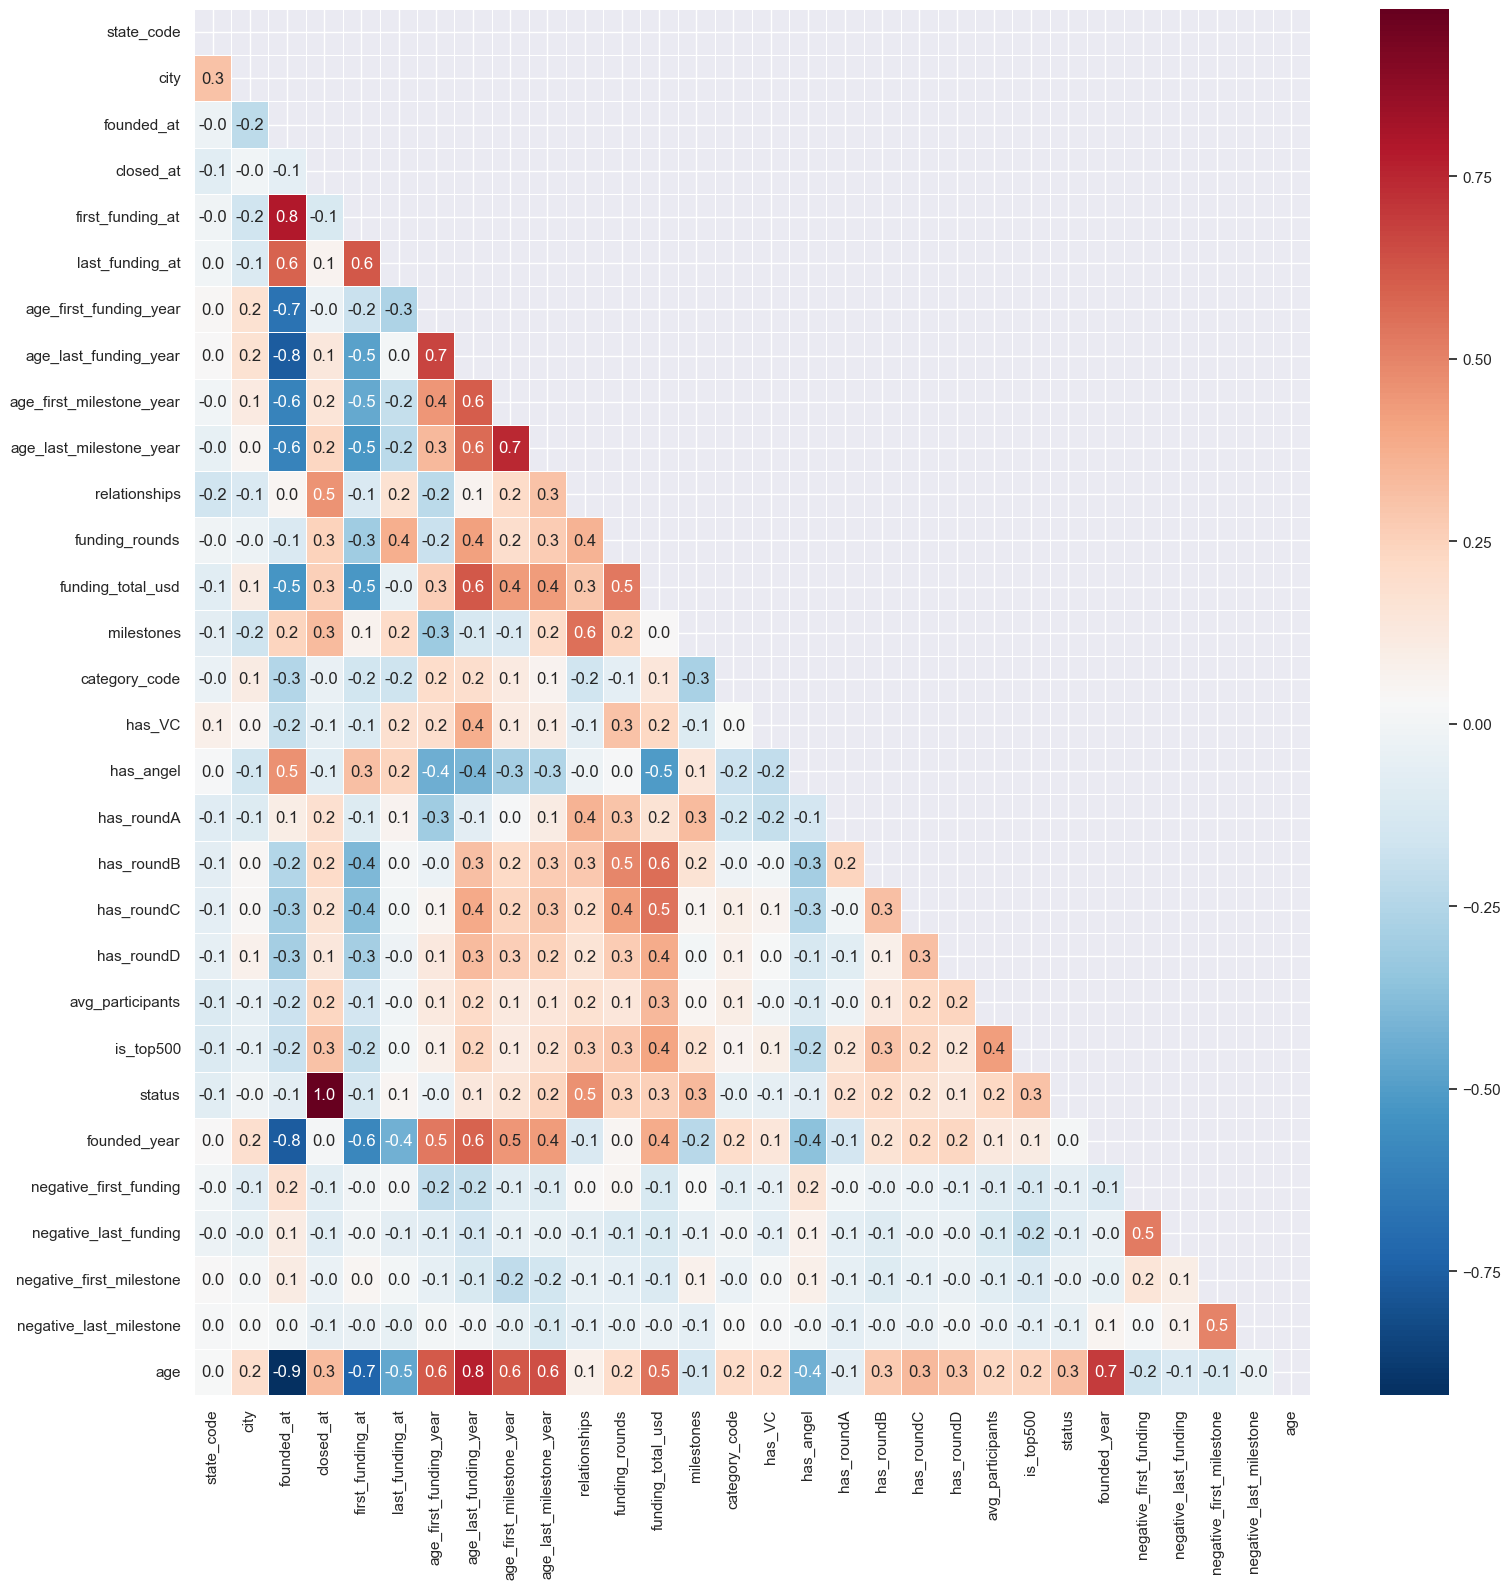

In [ ]:
def draw_heatmap(data_df):
    f, ax = plt.subplots(figsize=(18, 18))
    
    # Use a diverging colormap (e.g., RdBu_r for Red-Blue reversed)
    cmap = sns.color_palette("RdBu_r", as_cmap=True)
    
    corrMatt = data_df.corr(method='spearman')
    
    # Create a mask to hide the upper triangular part
    #To avoid redundancy and improve readability, it's common to visualize only one triangular part of the correlation matrix. 
    mask = np.triu(np.ones_like(corrMatt, dtype=bool))
    
    sns.heatmap(corrMatt, annot=True, linewidth=0.5, fmt='.1f', ax=ax, cmap=cmap, mask=mask)
    plt.show()
    ax.set_title('Multi-Collinearity of Features')

# Assuming 'data' is your DataFrame
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','datetime']
numerical_df_1 = data_df.select_dtypes(numerics)

draw_heatmap(numerical_df_1)

These features were chosen based on their correlations with the target(status) They represent the most relevant factors for analysis.

- **Relationships (0.5):**
  - Indicates the importance of networking and connections.
  - Assumption: Strong networks offer better resource access, benefiting the target outcome.

- **Age Last Milestone Year (0.2):**
  - Highlights the value of sustained growth and long-term strategies.
  - Assumption: Maturity and persistence are key factors influencing the target.

- **Age First Milestone Year (0.2):**
  - Indicates early success or potential significance.
  - Assumption: Early milestones reflect innovation or effective initial strategies.

- **Founding Rounds (0.3):**
  - Suggests that more funding rounds might slightly influence the target.
  - Assumption: Repeated funding signals a company's resilience and growth potential.

- **Funding Total USD (0.3):**
  - Suggests that higher funding can be beneficial but is not a decisive factor.
  - Assumption: Funding alone is not the sole determinant of the target outcome. 


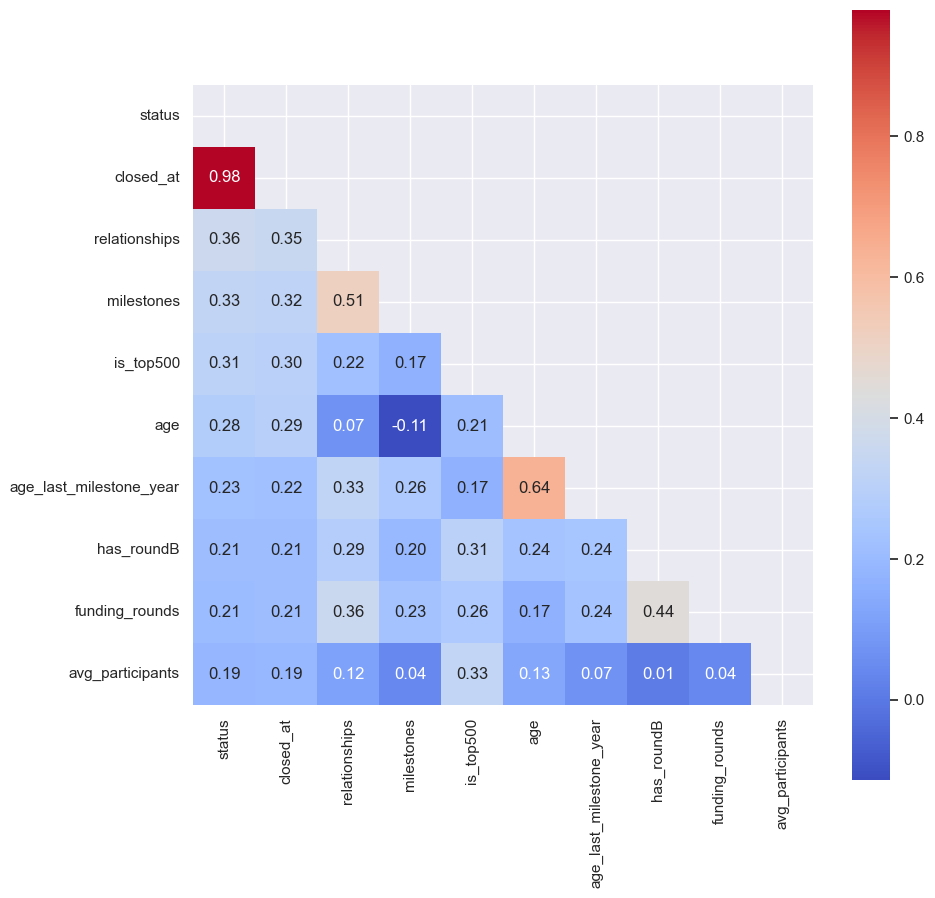

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_df' is your existing DataFrame and 'is_acquired' is your target variable

# Select all columns, including datetime
cols = data_df.columns

# Calculate the correlation of the numerical features with the target variable
numeric_cols = data_df.select_dtypes(include=[np.number])
cols = numeric_cols.corr().nlargest(10, 'status')['status'].index

# Compute the correlation matrix for the selected features
cm = np.corrcoef(data_df[cols].values.T)

# Create a mask to hide the lower triangle (including the diagonal)
mask = np.triu(np.ones_like(cm, dtype=bool))

# Plot the heatmap with the mask
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'fontsize': 12}, mask=mask, cmap='coolwarm', yticklabels=cols.values, xticklabels=cols.values)
plt.show()


Add description ...

 ##### **Do startups that receive funding in rounds A, B, or C have a better chance of succeeding than those that rely on angel investors or venture capital?**

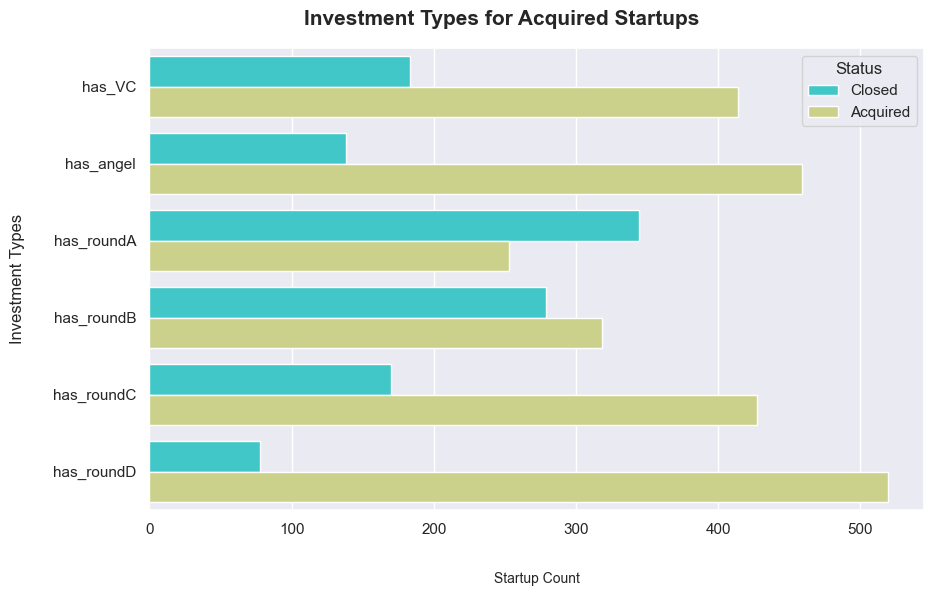

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter the DataFrame for entries with a status of 1
d = data_df.loc[data_df['status'] == 1]

# Select only the relevant binary columns
f = d[["has_VC", "has_angel", "has_roundA", "has_roundB", "has_roundC", "has_roundD"]]

# Melt the DataFrame to long format for use with countplot
melted_f = pd.melt(f)

# Map the binary values to strings
melted_f['value'] = melted_f['value'].map({1: 'acquired', 0: 'closed'})

# Create the countplot with horizontal bars
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=melted_f, y='variable', hue='value', orient='h', palette="rainbow")

# Update the y-axis label with adjusted position
ax.set_ylabel("Investment Types", labelpad=20)  # Adjust labelpad for position
ax.set_xlabel("Startup Count", fontsize=10, labelpad=25)

# Create the title manually and adjust its position
ax.text(0.2, 1.05, "Investment Types for Acquired Startups", fontsize=15, transform=ax.transAxes, fontweight='bold')  # Adjust the x and y values

# Update the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Closed', 'Acquired'], title='Status')

plt.show()

The chart shows that the type of investment can be linked to a startup's chances of being acquired, with later-stage investments being more associated with acquisitions.

 ##### **Does the number of milestones achieved impact a startup's chance of getting acquired?**

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you already have your data_df with numerical "milestones" and "status" columns

# Group your data by milestones and status and count the occurrences
grouped = data_df.groupby(["milestones", "status"]).size().reset_index(name="count")
grouped.columns = ["source", "target", "value"]
grouped['target'] = grouped['target'].map({0: 'closed', 1: 'acquired'})
grouped['source'] = grouped.source.map({0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 8: '8'})
links = pd.concat([grouped], axis=0)
unique_source_target = list(pd.unique(links[['source', 'target']].values.ravel('K')))
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
links['source'] = links['source'].map(mapping_dict)
links['target'] = links['target'].map(mapping_dict)

# Convert links DataFrame to dictionary
links_dict = links.to_dict(orient='list')

# Apply the color map to the links
# Directly use the 'acquired' and 'closed' labels to determine the color
link_colors = ['rgba(144, 238, 144, 0.5)' if target == 'acquired' else 'rgba(255, 0, 0, 0.5)' for target in grouped['target']]


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=unique_source_target,
        color="white"
    ),
    link=dict(
        source=links_dict["source"],
        target=links_dict["target"],
        value=links_dict["value"],
        color=link_colors  # Apply the colors to the links
    )
)])

fig.update_layout(
    annotations=[
        dict(
            x=0.5,  # Set x to 0.5 for centering horizontally
            y=1.20,  # Adjust y as needed 
            text="Analyzing the Correlation: Milestones Achievement vs Startup Status",
            showarrow=False,
            font=dict(
                size=18,
                family="Arial, sans-serif"  # Using a bold font family
            ),
            textangle=0,  
            xref="paper",
            yref="paper"
        ),
        # Add a comma here after the closing brace of the first dictionary
        dict(
            x=-0.10,  # Position to the left of the diagram
            y=0.5,    # Vertically centered
            text="Milestones Achievement",  # Text for the left side
            showarrow=False,
            font=dict(size=15),
            textangle=-90,  # Rotate text to be vertical
            xref="paper",
            yref="paper"
        ),
        dict(
            x=1.05,  # Position to the right of the diagram
            y=0.5,   # Vertically centered
            text="Startup Status",  # Text for the right side
            showarrow=False,
            font=dict(size=15),
            textangle=-90,  # Rotate text to be vertical
            xref="paper",
            yref="paper"
        )
    ]
)

fig.show()

The data indicates that startups achieving up to four milestones have a significantly higher likelihood of being acquired than those that do not.
-  Specifically, there is a prominent increase in acquisitions for startups reaching two to four milestones, underscoring the importance of early milestone achievement in determining startup success.

 Although the number of acquisitions dips for milestones beyond four, the overall data supports the positive impact of milestone achievements on a startup's prospects for acquisition. This trend reinforces the value of setting and reaching milestones as a strategy for startups aiming to enhance their status and success in the industry.

 ##### **What is the average total funding for startups that successfully get acquired VS those that close?**

In [ ]:
import plotly.express as px

# Define a list of pastel color codes
colors = ['#1f77b4', '#d62728']

# Filter out extreme outliers from the data
max_value = data_df['funding_total_usd'].quantile(0.99)  # Define a threshold (e.g., 99th percentile)
filtered_data = data_df[data_df['funding_total_usd'] < max_value]

# Create a histogram with the filtered data
fig = px.histogram(data_frame=filtered_data, x='funding_total_usd', color='status',
                   labels={'funding_total_usd': 'Total Funding (USD in Millions)'},
                   color_discrete_sequence=colors)  
                   
# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Distribution of Total Funding (Excluding Outliers): Acquired vs Closed Startups',
        'y': 0.95,  # You can adjust this for vertical position
        'x': 0.5,  # You can adjust this for horizontal position
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 17,
            'color': 'black',  # You can change the color if you want
            'family': 'Arial, sans-serif', # You can change the font family if you want
        },
    },
    xaxis_title='Total Funding (USD in Millions)',
    yaxis_title='Frequency',
)
# Format the x-axis tick labels to display values in millions
fig.update_xaxes(tickformat=".2s", exponentformat="none")

# Show the figure
fig.show()


/Users/gabrielaarzate/.virtualenvs/startup/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Most startups, whether acquired or closed, tend to have lower levels of total funding, with the likelihood of either acquisition or closure diminishing as funding amounts increase. 

This might imply that while sufficient funding is necessary for a startup's success, it is not the only determining factor, and there is a threshold beyond which more funding does not necessarily equate to greater chances of success.

 ##### **Conclusion**

Data preprocessing played a key role in turning raw information into practical insights. Techniques such as mapping, removing negative values, and carefully addressing outliers were vital in making sure our analysis provided meaningful and accurate information about the underlying patterns.

Our analysis has uncovered valuable insights into the factors that influence the status of startups. Networking, industry trends, milestone achievements, and funding all have significant impacts on a startup's future success.

Cleaning and preparing the data were essential steps in this process. They helped us remove inconsistencies and ensure that our analysis was based on trustworthy and dependable data.